In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('datasets/datasets/50_Startups.csv')

In [3]:
df.shape

(50, 5)

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
np.cov(df['R&D Spend'],df['Administration'])[0,1]

311173890.6712431

In [6]:
df.cov()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,2.107017e+09,3.111739e+08,4.065495e+09,1.800007e+09
Administration,3.111739e+08,7.849973e+08,-1.101690e+08,2.266673e+08
Marketing Spend,4.065495e+09,-1.101690e+08,1.495492e+10,3.685779e+09
Profit,1.800007e+09,2.266673e+08,3.685779e+09,1.624588e+09


In [7]:
np.corrcoef(df['R&D Spend'],df['Administration'])[0,1]

0.24195524508168925

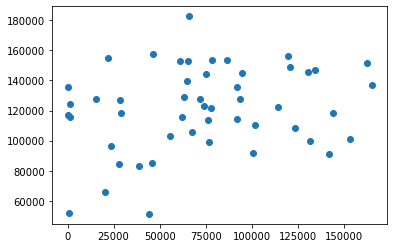

In [8]:
plt.scatter(df['R&D Spend'],df['Administration'])## here only 24% related in positive way

In [9]:
np.corrcoef(df['R&D Spend'],df['Profit'])[0,1]

0.9729004656594832

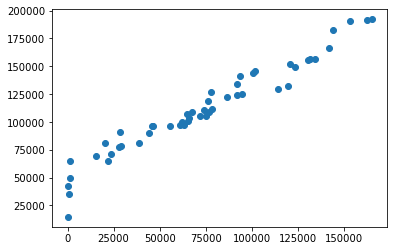

In [10]:
plt.scatter(df['R&D Spend'],df['Profit'])## this is 95% ,very muuch linear

In [11]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## Chi Square Test

In [12]:
df2=pd.read_csv('datasets/datasets/diamonds.csv')

In [13]:
df2.shape

(53940, 10)

In [14]:
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
pd.unique(df2['cut'])

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [16]:
pd.unique(df2['color'])

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [17]:
pd.unique(df2['clarity'])

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [18]:
pd.crosstab(df2['color'],'col')

col_0,col
color,
D,6775
E,9797
F,9542
G,11292
H,8304
I,5422
J,2808


In [19]:
pd.crosstab(df2['color'],df2['clarity'])

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
color,,,,,,,,
D,42,73,2083,1370,705,1697,252,553
E,102,158,2426,1713,1281,2470,656,991
F,143,385,2131,1609,1364,2201,734,975
G,150,681,1976,1548,2148,2347,999,1443
H,162,299,2275,1563,1169,1643,585,608
I,92,143,1424,912,962,1169,355,365
J,50,51,750,479,542,731,74,131


In [20]:
pd.crosstab(df2['color'],df2['clarity'],margins=True)

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,All
color,,,,,,,,,
D,42,73,2083,1370,705,1697,252,553,6775
E,102,158,2426,1713,1281,2470,656,991,9797
F,143,385,2131,1609,1364,2201,734,975,9542
G,150,681,1976,1548,2148,2347,999,1443,11292
H,162,299,2275,1563,1169,1643,585,608,8304
I,92,143,1424,912,962,1169,355,365,5422
J,50,51,750,479,542,731,74,131,2808
All,741,1790,13065,9194,8171,12258,3655,5066,53940


In [21]:
import scipy.stats as stats

In [22]:
stats.chi2_contingency(pd.crosstab(df2['color'],df2['clarity']))

(2047.0791639481317,
 0.0,
 42,
 array([[  93.0714683 ,  224.82851316, 1640.99694105, 1154.78958102,
         1026.29820171, 1539.63570634,  459.07721542,  636.30237301],
        [ 134.58615128,  325.11364479, 2372.9663515 , 1669.88539118,
         1484.08021876, 2226.39276974,  663.84936967,  920.12610308],
        [ 131.08309232,  316.65146459, 2311.20189099, 1626.42098628,
         1445.45202076, 2168.44338154,  646.57044865,  896.17671487],
        [ 155.12369299,  374.72525028, 2735.0756396 , 1924.70611791,
         1710.54749722, 2566.1352614 ,  765.1512792 , 1060.5352614 ],
        [ 114.07608454,  275.56840934, 2011.34149055, 1415.40556174,
         1257.91590656, 1887.10478309,  562.68298109,  779.90478309],
        [  74.48464961,  179.92918057, 1313.28197998,  924.17256211,
          821.34152762, 1232.16307008,  367.39729329,  509.22973674],
        [  38.57486096,   93.18353726,  680.13570634,  478.61979978,
          425.36462736,  638.12502781,  190.27141268,  263.725027

In [23]:
test,p,dof =stats.chi2_contingency(pd.crosstab(df2['color'],df2['clarity']))[0:3]

In [24]:
test

2047.0791639481317

In [25]:
p

0.0

In [26]:
dof

42

In [27]:
###With a p-value < 0.05 , we can reject the null hypothesis.
###There is definitely some sort of relationship between 'clarity' and 'color' column. 
###We don't know what this relationship is, but we do know that these two variables are not independent of each other.

